## Predict Subject Activity in mHealth Dataset

This data obtained form MHealth dataset from UC Irive. Sensors captured data from different 
body parts.

Data Set Information:

The MHEALTH (Mobile HEALTH) dataset comprises body motion and vital signs recordings for ten volunteers of diverse profile while performing several physical activities. 
Sensors placed on the subject's 
    chest 
    right wrist 
    left ankle 
used to measure the motion experienced by diverse body parts, namely, 
    acceleration
    rate of turn and magnetic field orientation. 
The sensor positioned on the chest also provides 
    2-lead ECG measurements, 
which can be potentially used for basic heart monitoring, checking for various arrhythmias or looking at the effects of exercise on the ECG. 


EXPERIMENTAL SETUP 
The collected dataset comprises body motion and vital signs recordings for ten volunteers of diverse profile while performing 12 physical activities (Table 1). Shimmer2 [BUR10] wearable sensors were used for the recordings. The sensors were respectively placed on the subject's chest, right wrist and left ankle and attached by using elastic straps (as shown in the figure in attachment).

The use of multiple sensors permits us to measure the motion experienced by diverse body parts, namely, the acceleration, the rate of turn and the magnetic field orientation, thus better capturing the body dynamics. 

The sensor positioned on the chest also provides 2-lead ECG measurements which are not used for the development of the recognition model but rather collected for future work purposes.

This information can be used, for example, for basic heart monitoring, checking for various arrhythmias or looking at the effects of exercise on the ECG. 

All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity. Each session was recorded using a video camera. This dataset is found to generalize to common activities of the daily living, given the diversity of body parts involved in each one (e.g., frontal elevation of arms vs. knees bending), the intensity of the actions (e.g., cycling vs. sitting and relaxing) and their execution speed or dynamicity (e.g., running vs. standing still). The activities were collected in an out-of-lab environment with no constraints on the way these must be executed, with the exception that the subject should try their best when executing them. 


1. Standing still (1 min)
2. Sitting and relaxing (1 min)
3. Lying down (1 min)
4. Walking (1 min)
5. Climbing stairs (1 min)
6. Waist bends forward (20x)
7. Frontal elevation of arms (20x)
8. Knees bending (crouching) (20x)
9. Cycling (1 min)
10. Jogging (1 min)
11. Running (1 min)
12. Jump front & back (20x)

The dataset includes 1,215,745 samples, 343,195 labeled with a known activity.

It is based on 4 sensors placed on the body:
    
    2-lead ECG
    3 monitors placed around body
        Locations
            Chest
            Left ankle
            Right lower-arm
        Sensors
            Accelerometer (X, Y, Z)
            Gyroscope (X, Y, Z) - not on chest
            Magnetometer (X, Y, Z)


Data based on 23 different sensor inputs:
    
    1.acceleration from the chest sensor (X axis)
    2.acceleration from the chest sensor (Y axis)
    3.acceleration from the chest sensor (Z axis)
    4.electrocardiogram signal (lead 1)
    5.electrocardiogram signal (lead 2)
    6.acceleration from the left-ankle sensor (X axis)
    7.acceleration from the left-ankle sensor (Y axis)
    8.acceleration from the left-ankle sensor (Z axis)
    9.gyro from the left-ankle sensor (X axis)
    10.gyro from the left-ankle sensor (Y axis)
    11.gyro from the left-ankle sensor (Z axis)
    12.magnetometer from the left-ankle sensor (X axis)
    13.magnetometer from the left-ankle sensor (Y axis)
    14.magnetometer from the left-ankle sensor (Z axis)
    15.acceleration from the right-lower-arm sensor (X axis)
    16.acceleration from the right-lower-arm sensor (Y axis)
    17.acceleration from the right-lower-arm sensor (Z axis)
    18.gyro from the right-lower-arm sensor (X axis)
    19.gyro from the right-lower-arm sensor (Y axis)
    20.gyro from the right-lower-arm sensor (Z axis)
    21.magnetometer from the right-lower-arm sensor (X axis)
    22.magnetometer from the right-lower-arm sensor (Y axis)
    23.magnetometer from the right-lower-arm sensor (Z axis)

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.tools.merge import concat
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from collections import Counter
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [57]:
#create columns
cols = ["ChestX","ChestY","ChestZ",
        "ECGl1","ECGl2",
        "AnkleAccX","AnkleAccY","AnkleAccZ",
        "AnkleGyroX","AnkleGyroY","AnkleGyroZ",
        "AnkleMagX","AnkleMagY","AnkleMagZ",
        "ArmAccX","ArmAccY","ArmAccZ",
        "ArmGyroX","ArmGyroY","ArmGyroZ",
        "ArmMagX","ArmMagY","ArmMagZ","Label"]


In [58]:
#labelmap based on activity 
labelMap = {
        1: "Standing still (1 min)",
        2: "Sitting and relaxing (1 min)",
        3: "Lying down (1 min)",
        4: "Walking (1 min)",
        5: "Climbing stairs (1 min)",
        6: "Waist bends forward (20x)",
        7: "Frontal elevation of arms (20x)",
        8: "Knees bending (crouching) (20x)",
        9: "Cycling (1 min)",
        10: "Jogging (1 min)",
        11: "Running (1 min)",
        12: "Jump front & back (20x)"
    }


In [59]:
from os import listdir

In [60]:
listdir('/Users/SamiraMiss/Downloads/MHEALTHDATASET/')

['mHealth_subject1.log',
 'mHealth_subject10.log',
 'mHealth_subject2.log',
 'mHealth_subject3.log',
 'mHealth_subject4.log',
 'mHealth_subject5.log',
 'mHealth_subject6.log',
 'mHealth_subject7.log',
 'mHealth_subject8.log',
 'mHealth_subject9.log',
 'README.txt']

In [61]:
# Mike's example to read data
subj_1_path = '/Users/SamiraMiss/Downloads/MHEALTHDATASET/mHealth_subject1.log'

subject_1_df = pd.read_csv(subj_1_path, delim_whitespace=True, header=None, names=cols)

#df = pd.read_csv(subj_1_path)

In [62]:
# Main dataframe
data = pd.DataFrame()

In [63]:
# Loop through 10 data files and load into data
#list_ = []
for i in range(1,11):
    df = pd.read_csv("/Users/SamiraMiss/Downloads/MHEALTHDATASET/mHealth_subject"+str(i)+".log",
                     index_col=None, names=cols, delimiter="\t")
    #list_.append(df)
#data = pd.concat(list_)
    data = pd.concat([data, df])

print ("Raw data shape: "+str(data.shape))


Raw data shape: (1215745, 24)


In [64]:
# Delete rows with no activity label
data = data[data.Label != 0]

print ("Labeled data shape: "+str(data.shape))

Labeled data shape: (343195, 24)


In [65]:
# Create subset of data to reduce complexity
data = data.loc[np.random.choice(data.index, 4000, replace=False)]
print ("Reduced data shape: "+str(data.shape))

Reduced data shape: (14701, 24)


Base data exploration
Understanding the values
A simple description is helpful to understanding the types of values we are looking at, across the different types of sensors.


In [66]:
data.describe()

,ChestX,ChestY,ChestZ,ECGl1,ECGl2,AnkleAccX,AnkleAccY,AnkleAccZ,AnkleGyroX,AnkleGyroY,...,ArmAccX,ArmAccY,ArmAccZ,ArmGyroX,ArmGyroY,ArmGyroZ,ArmMagX,ArmMagY,ArmMagZ,Label
count,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,...,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000,14701.000000
mean,-7.395629,-0.162090,-0.853989,0.008777,-0.000566,1.834078,-8.924227,-0.408962,0.111543,-0.546360,...,-3.337425,-5.937737,2.486278,-0.181932,-0.426133,0.380461,-0.462323,1.537938,-0.104204,5.920958
std,5.424042,2.839136,4.668145,0.826105,0.820066,4.028027,5.004634,6.283241,0.452820,0.430834,...,5.588083,6.400382,4.094084,0.542244,0.554442,0.504745,32.300501,28.403509,79.569490,3.228531
min,-22.307000,-19.968000,-17.701000,-8.619600,-8.619600,-22.135000,-19.580000,-19.363000,-1.706900,-2.189500,...,-22.023000,-18.942000,-18.228000,-1.129400,-2.221800,-1.015100,-289.420000,-332.880000,-572.840000,1.000000
25%,-9.688100,-1.354100,-3.603500,-0.209310,-0.167450,0.172610,-9.947000,-3.067900,-0.328390,-0.808630,...,-4.953900,-9.610300,0.212690,-0.668630,-0.854210,-0.028017,-5.411000,-6.274300,-10.109000,3.000000
50%,-8.775800,-0.390560,-0.795340,-0.075353,-0.050235,1.402100,-9.585800,0.501280,0.217070,-0.682930,...,-2.411100,-7.823500,1.905500,-0.258820,-0.624230,0.448280,0.360740,0.352170,-0.709300,6.000000
75%,-5.137200,1.015800,1.185300,0.154890,0.133960,2.912600,-7.518100,1.976700,0.489800,-0.497190,...,-0.582350,-2.355000,5.408800,0.300000,-0.059548,0.829740,4.618600,7.190000,8.578900,9.000000
max,19.074000,20.917000,22.349000,8.460500,8.506500,20.003000,20.930000,24.642000,1.710600,1.752300,...,19.573000,21.846000,24.639000,1.317600,1.121100,1.334100,225.150000,297.350000,631.340000,12.000000


In [110]:
data['Label'].unique()

array([ 6,  8, 10,  9,  7,  1,  5, 11,  2,  4,  3, 12])

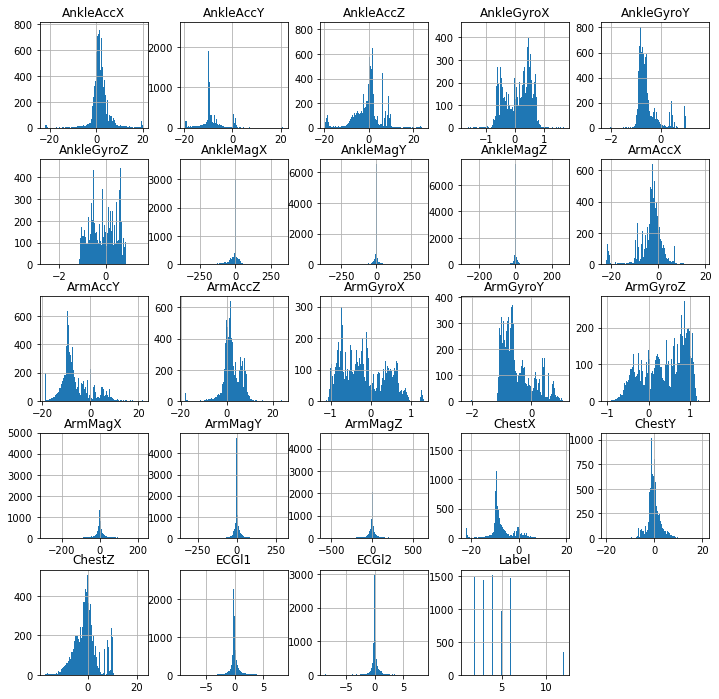

In [67]:
# Attribute histograms
data.hist(figsize=(12, 12), bins=185);


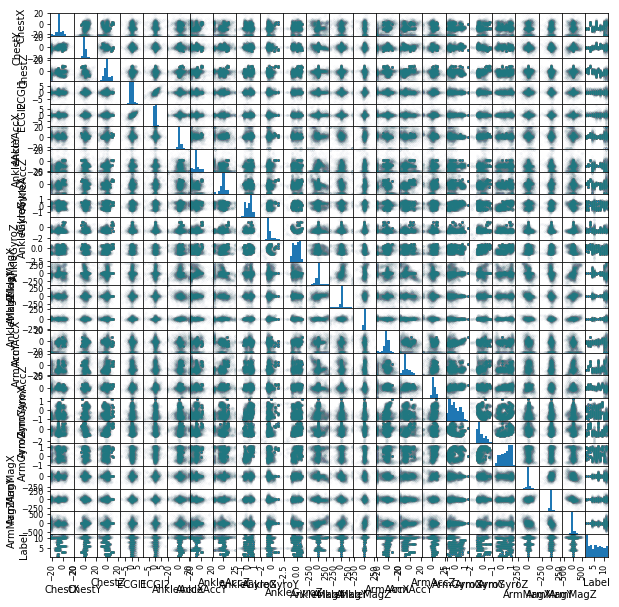

In [68]:
pd.scatter_matrix(data, figsize=(10, 10), s=20, alpha=0.01, cmap='brg', edgecolors='gray');


In [69]:
#Activity instances
#value_counts on label shows kind of uniformity across instances, jumping instance has no uniformity.
def actName(num):
    return labelMap[num]

vc = pd.DataFrame(data["Label"].value_counts())
vc.index.name = "Action"
vc.rename(columns={0:"Instances"}, inplace=True)
vc.index = vc.index.map(actName)
vc


,Label
Walking (1 min),1519
Sitting and relaxing (1 min),1477
Waist bends forward (20x),1471
Lying down (1 min),1437
Knees bending (crouching) (20x),1361
Standing still (1 min),1354
Frontal elevation of arms (20x),1304
Cycling (1 min),1230
Jogging (1 min),1160
Running (1 min),1071


In [70]:
#list activity features and creat activity binary features by assining a label to them 
activityFeatures = ["is_standing",
                    "is_sitting",
                    "is_lying",
                    "is_walking",
                    "is_climbing",
                    "is_bending",
                    "is_lifting_arms",
                    "is_bending_knees",
                    "is_cycling",
                    "is_jogging",
                    "is_running",
                    "is_jumping"]

actY = pd.DataFrame()

# Create activity-specific binary features
actY["is_standing"] = (data.Label == 1).astype(int)
actY["is_sitting"] = (data.Label == 2).astype(int)
actY["is_lying"] = (data.Label == 3).astype(int)
actY["is_walking"] = (data.Label == 4).astype(int)
actY["is_climbing"] = (data.Label == 5).astype(int)
actY["is_bending"] = (data.Label == 6).astype(int)
actY["is_lifting_arms"] = (data.Label == 7).astype(int)
actY["is_bending_knees"] = (data.Label == 8).astype(int)
actY["is_cycling"] = (data.Label == 9).astype(int)
actY["is_jogging"] = (data.Label == 10).astype(int)
actY["is_running"] = (data.Label == 11).astype(int)
actY["is_jumping"] = (data.Label == 12).astype(int)


we want to filter Arms, Ankle, Chest, and ECG columns with their sensor types 

In [71]:
# Filter to columns with arm data with their sensor type
X_arm = data[["ArmAccX","ArmAccY","ArmAccZ",
              "ArmGyroX","ArmGyroY","ArmGyroZ",
              "ArmMagX","ArmMagY","ArmMagZ","Label"]]

In [72]:
# Filter to columns with ankle data with their sensor type
X_ankle = data[["AnkleAccX","AnkleAccY","AnkleAccZ",
                "AnkleGyroX","AnkleGyroY","AnkleGyroZ",
                "AnkleMagX","AnkleMagY","AnkleMagZ"]]


In [73]:
#filter chest data
X_chest = data[["ChestX","ChestY","ChestZ"]]

In [74]:
#filter ecg data
X_ecg = data[["ECGl1","ECGl2"]]


In [75]:
sensorGroup = ["arm","ankle","chest","ecg"]

In [76]:
print("Arm data shape: "+str(X_arm.shape))

print("Ankle data shape: "+str(X_ankle.shape))

print("Chest data shape: "+str(X_chest.shape))

print ("ECG data shape: "+str(X_ecg.shape))

Arm data shape: (14701, 10)
Ankle data shape: (14701, 9)
Chest data shape: (14701, 3)
ECG data shape: (14701, 2)


,ChestX,ChestY,ChestZ,ECGl1,ECGl2,AnkleAccX,AnkleAccY,AnkleAccZ,AnkleGyroX,AnkleGyroY,...,ArmAccX,ArmAccY,ArmAccZ,ArmGyroX,ArmGyroY,ArmGyroZ,ArmMagX,ArmMagY,ArmMagZ,Label
ChestX,1.000000,0.100903,0.273551,0.033798,-0.003641,0.049932,0.323585,0.178722,0.044724,0.308601,...,0.311816,0.277949,-0.015684,0.078162,0.225125,0.032099,0.022632,0.044005,-0.020154,-0.017502
ChestY,0.100903,1.000000,-0.454691,0.022436,-0.001989,-0.089135,-0.174118,-0.108992,-0.034479,-0.270251,...,0.111429,-0.083404,-0.114561,0.138719,-0.339928,-0.082479,-0.050096,-0.081656,0.151116,0.239419
ChestZ,0.273551,-0.454691,1.000000,-0.015230,-0.026316,0.165307,0.403776,0.326562,0.125919,0.458757,...,-0.005883,0.414032,0.210855,-0.062252,0.522960,0.151591,-0.008694,-0.035395,0.021530,-0.433505
ECGl1,0.033798,0.022436,-0.015230,1.000000,0.572134,0.004163,-0.008345,0.029989,0.026962,0.011875,...,-0.047859,-0.013065,0.015361,0.008104,-0.020666,0.011012,0.030035,-0.033683,0.047584,0.007615
ECGl2,-0.003641,-0.001989,-0.026316,0.572134,1.000000,-0.016571,-0.019164,0.045479,0.021200,0.005281,...,-0.059669,-0.015181,0.053360,0.013622,-0.039094,0.009432,0.014930,-0.006379,0.016671,0.005673
AnkleAccX,0.049932,-0.089135,0.165307,0.004163,-0.016571,1.000000,0.093254,-0.071860,0.133675,0.162759,...,-0.106387,0.124383,-0.027532,-0.105055,0.155420,0.019059,-0.021776,0.023912,0.004744,0.026666
AnkleAccY,0.323585,-0.174118,0.403776,-0.008345,-0.019164,0.093254,1.000000,0.165864,0.109667,0.487707,...,0.033031,0.185912,0.158289,0.062178,0.319444,0.120621,-0.026875,-0.114564,0.040193,-0.245223
AnkleAccZ,0.178722,-0.108992,0.326562,0.029989,0.045479,-0.071860,0.165864,1.000000,0.017188,0.325145,...,-0.181028,0.386452,0.191018,0.034208,0.128996,0.023096,0.095071,0.053284,0.054568,-0.346086
AnkleGyroX,0.044724,-0.034479,0.125919,0.026962,0.021200,0.133675,0.109667,0.017188,1.000000,0.172597,...,-0.036732,0.049218,0.115899,0.425629,0.061946,0.580082,0.049946,0.038939,-0.050000,-0.026343
AnkleGyroY,0.308601,-0.270251,0.458757,0.011875,0.005281,0.162759,0.487707,0.325145,0.172597,1.000000,...,-0.171574,0.289353,0.102986,0.073519,0.374498,0.106491,-0.094597,-0.066516,0.095197,-0.181543


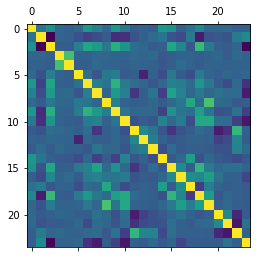

In [77]:
#see if there is a likely correlation between these data
cor = data.corr(method='pearson')
plt.matshow(cor)
cor

## Part II: Supervised Learning
For pusposes of testing, wrist-only data will be considered to assess model ability to accurately predict user activity.

In [113]:
# separate the activity "label" as target attribute for prediction and 
#put the remaining values in X.
X = data.drop("Label")
y = data["Label"]

print(X.shape)
print(y.shape)

(14701, 24)
(14701,)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [119]:
sample_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression())
])

sample_pipe_params = {
    'pca__n_components':[3,5,10,20],
    'clf__C':np.logspace(-4,2,7),
}

sample_gs = GridSearchCV(sample_pipe, sample_pipe_params, cv=5)

In [120]:
sample_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [3, 5, 10, 20], 'clf__C': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [121]:
sample_gs.best_params_

{'clf__C': 100.0, 'pca__n_components': 20}

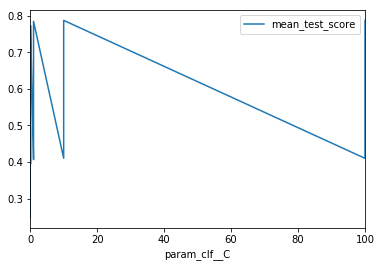

In [127]:
pd.DataFrame(sample_gs.cv_results_).plot('param_clf__C','mean_test_score')

In [122]:
sample_gs.best_score_

0.78748299319727888

In [123]:
sample_gs.score(X_test, y_test)

0.7924374319912949

##### The goal is to create a classifier that can predict the "Label" feature - testing our ability to predict what activity the subject is performing given the other features.


In [ ]:
#Using pipelines allows us to encapsulate multiple steps into a single Python object that adheres to the familiar 
#scikit-learn interface of fit, predict, and transform.
    #feature extraction
    #preprocessing 
    #model

In [ ]:
# GridsearchCV tries all possible combinations of the specified parameters 

#we want to combine GridsearchCV and pipleline (with standard scaler in the pipeline)
#we want to use two steps: one for processing and the other one for classifier 


In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', ())])
#here is an example. I was not sure why used logistic regression for classifier  

In [ ]:
#define the parameter grid for search over 

In [ ]:
param_grid 

In [ ]:
#we need to know what classifier to use 
#each classifier needs different parameters to tune and different processing 
#GridSearchCV allows the param_grid to be a list of dictionaries
#do we need to use kernel in our param_grid 
#we can set the step as non if ther is no need for processing 


In [ ]:
#instantiate and run a grid search

In [ ]:
# GridsearchCV tries all possible combinations of the specified parameters 
    
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


In [ ]:

print("Logistic regression step:\n{}".format( grid.best_estimator_.named_steps["logisticregression"]))


In [ ]:
#After trainig LogisticRegression instance, we can access the coeffi‐ cients (weights) 
#associated with each input feature:

In [ ]:
print("Logistic regression coefficients:\n{}".format( grid.best_estimator_.named_steps["logisticregression"].coef_))

In [ ]:
#pipleline: feature extraction, feature selection, scaling, and classification
#the last step needs trandform method so the result can be usedfor next step


In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))


In [ ]:
#Performing principal component analysis with matplotlib.
# The input is a 2d numpy array where columns (sensors the dimensions you want reduced)
#and rows are the body motions. 

#

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in result.Y:
 x.append(item[0])
 y.append(item[1])
 z.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # make a scatter plot of blue dots from the data
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("The title of the plot")
plt.show() # show the plot

## Dimensionality reduction
Apply PCA for a different number of components to identify optimal number of components

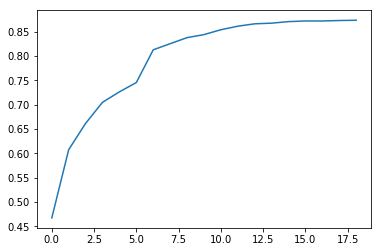

In [88]:
from sklearn.decomposition import PCA

pcaRes = []

for n in range(1,20):
    pca = PCA(n_components = n)
    X_pca = pd.DataFrame(pca.fit_transform(X))

    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1234)
    
    classifier = neighbors.KNeighborsClassifier(7)
    clf = classifier.fit(X_train, y_train)

    pcaRes.append(metrics.f1_score(y_train, clf.predict(X_train), average='weighted'))
    

plt.plot(pcaRes)



In [89]:
# Run PCA on optimal N identified above
pca = PCA(n_components = 12)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(X_pca.shape)
print(y.shape)

(14701, 12)
(14701,)


In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_train, clf.predict(X_train)))

             precision    recall  f1-score   support

          1       1.00      0.99      1.00       958
          2       1.00      1.00      1.00      1016
          3       1.00      1.00      1.00       997
          4       0.80      0.92      0.85      1071
          5       0.72      0.69      0.71       672
          6       0.81      0.92      0.86      1022
          7       0.89      0.93      0.91       926
          8       0.80      0.76      0.78       936
          9       0.89      0.91      0.90       874
         10       0.80      0.83      0.81       814
         11       0.92      0.76      0.83       755
         12       0.86      0.26      0.40       249

avg / total       0.88      0.88      0.87     10290



In [92]:
#my average parameter was not correct so I changed it to weighted.

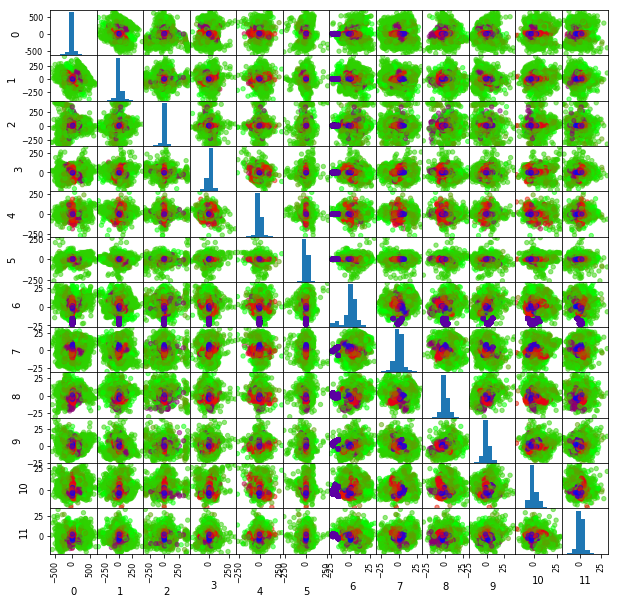

In [84]:
# Plot scatter matrix of PCA-identified features
pd.scatter_matrix(X_pca, c=y, cmap='brg', s=75, figsize=(10, 10));

In [107]:
type(y)

pandas.core.series.Series

In [112]:
y_train.unique()

array([0, 1])

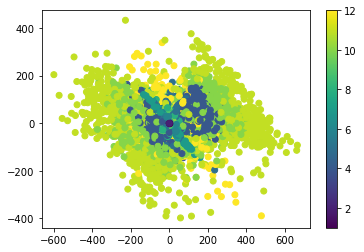

In [111]:
plt.scatter(X_pca.loc[:,0], X_pca.loc[:,1], c=data['Label'])
plt.colorbar()

## Classification

The goal is to create a classifier that can predict the "Label" feature - testing our ability to predict what activity the subject is performing given the other features.

According to the SciKit-Learn Cheat-Sheet, the recommended classifier with >100k samples is the SGD Classifier, so we explore that first (also because Linear SVC breaks).

K-Nearest Neighbors Optimization
Explore the results using KNN, but experimentation is required to find the optimal k.


[0.84379959192926779, 0.8206755837678531, 0.83314441169802766, 0.82838358648832466, 0.84198594423033324, 0.83405123554749494, 0.83699841305826339, 0.82271593742915439, 0.82770346860122423, 0.82520970301518926, 0.82294264339152123, 0.82135570165495353, 0.8238494672409884, 0.81931534799365224]


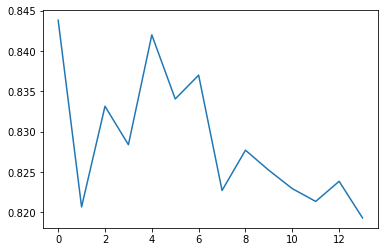

In [93]:
# Test k ranging 1-15
scores = []
for k in range(1, 15):
    clf = neighbors.KNeighborsClassifier(k)  #, weights='distance'

    clf.fit(X_train, y_train);

    scores.append(clf.score(X_test, y_test))
    
print(scores)
plt.plot(scores)

The chart above indicates that k=1 is optimal but doing so yields strange results below, so the second-best k=3 is used in further analyses.

## Compare Classifiers
    Explore results using a range of classifiers:
    KNN (n=3, as determined above)
    Decision tree
    Naïve Bayes
    Logistic Regression
    SGDClassifier (as linear SVM breaks)

In [102]:
# I want to see what classifier performs better than other classification. I want the 
#(This demonstrates quite clearly KNN singnificantly outperfoms other classifiers)


#as we saw above K=1 makes strange result. from graph above we select KnnN = 3
knnN = 3

#verbose ="tell me everything about what you are doing all the time". this will make the algorithm slow and we 
#dont want that so we set the verbose as false 
verbose = False

N = len(X_pca)
folds = 10

#  we set up cross-validation folds (set kfold cross validation iterator )
kf = KFold(N, n_folds=folds)

# Create array of classifiers to test. The classifiers that don't work get deactivated.  
classifiers = [
        #naive_bayes.MultinomialNB(),  # Doesn't work due to negative values in one feature
        #SVC(kernel="linear"),
        #svm.SVR,
        neighbors.KNeighborsClassifier(knnN), #, weights='distance'
        DecisionTreeClassifier(max_depth=3, random_state=1),
        naive_bayes.BernoulliNB(),
        linear_model.LogisticRegression(),
        linear_model.SGDClassifier(shuffle=True, loss='log')]

res_f = pd.DataFrame()
#loop throught the classifiers

for classifier in classifiers:
    # Build array for classifier results, to append to res_auc
    col_f = []
    splitCtr = 0
# Loop through folds
for train, test in kf:
    if(verbose):
        print("train: "+str(train.shape))
        print("test: "+str(test.shape))
    
splitCtr += 1
# Create t/t split
X_train, X_test, y_train, y_test = X_pca.iloc[train], X_pca.iloc[test],y.iloc[train],y.iloc[test]

if(verbose):
        print("X_train: "+str(X_train.shape))
        print("X_test: "+str(X_test.shape))
        print("y_train: "+str(y_train.shape))
        print("y_test: "+str(y_test.shape))
# Build model using passed classifier
clf = classifier.fit(X_train, y_train)

# Get train test accuracy scores - not reported currently
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_train, y_train)

# Get array of prediction results
y_train_predicted = clf.predict(X_train)

# Calculate prec, rec and ROC AUC
prec = metrics.precision_score(y_train, y_train_predicted, average='weighted')
rec = metrics.recall_score(y_train, y_train_predicted, average='weighted')
f = metrics.f1_score(y_train, y_train_predicted, average='weighted')
#auc = metrics.roc_auc_score(y_train, y_train_predicted, average='weighted')

# Append F to col_f that created as list 
col_f.append(f)
if(verbose):
    print("--------",classifier.__class__.__name__,"- Split",splitCtr,"---------")
    print("Actual 0/1 split (tr)",Counter(y_train))
    print("Prediction 0/1 split (tr)",Counter(y_train_predicted))
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:%0.2f" % (test_accuracy))
    print("Precision: ",prec)
    print("Recall: ",rec)
    print ("F: ",f)
    print(y_train_predicted)
    res_f[classifier.__class__.__name__] = col_f
# Render table
res_f

""


In [95]:
verbose

False

#KNN Breakdown by Activity
A logical question is how well the model can predict different activities by KNN classifier for each activity.

In [96]:
#I want to see how well KNN performs for percision, recall and F-measure 

res = pd.DataFrame()

for act in activityFeatures:
    
    # Create y for activity
    y = actY[act]
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1234)

    classifier = neighbors.KNeighborsClassifier(knnN)
    clf = classifier.fit(X_train, y_train)

    actRes = []
    
    # Get array of prediction results
    y_train_predicted = clf.predict(X_train)
    
    # Calculate prec, rec and ROC AUC(Receiver Operator Characteristic (ROC))curves are commonly used to present results
    #for binary decision.
    actRes.append(metrics.precision_score(y_train, y_train_predicted))
    actRes.append(metrics.recall_score(y_train, y_train_predicted))
    actRes.append(metrics.f1_score(y_train, y_train_predicted))
    
    res[act] = actRes

# Summarize output
res = res.transpose()
res.columns=["Precision","Recall","F-Measure"]
res = res.sort(["F-Measure"], ascending=False)
res

/Users/SamiraMiss/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Precision,Recall,F-Measure
is_sitting,1.000000,1.000000,1.000000
is_lying,1.000000,1.000000,1.000000
is_standing,0.991675,0.994781,0.993226
is_lifting_arms,0.937835,0.944924,0.941366
is_cycling,0.935142,0.907323,0.921022
is_walking,0.903882,0.913165,0.908500
is_bending,0.908635,0.885519,0.896928
is_running,0.948407,0.827815,0.884017
is_jogging,0.871549,0.891892,0.881603
is_bending_knees,0.875740,0.790598,0.830994


F-measueres values have wide range. This will indicate that some activities being easier to predict than others. 

Apparently, lying down is a completely different position than any of the others, so the results are pathogonomic. 

-High precision indicates posibility of accurate identification among all activities
-Low recall (and corresponding F-Measure) for some activities indicate high FP's so frequently mis-classifying things.

This is might be because some of these activities are a ambiguous, like the difference between running and jogging. Or from the perspective of a single sensor, the difference between climbing and jumping is probably relatively small.


## See which sensor is most critical.

In [100]:
res = pd.DataFrame()

# Loop through each activity
for act in activityFeatures:
    
    # Create y for activity
    y = actY[act]
    
    actRes = []
    
# ARM
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_arm, y, test_size=0.3, random_state=1234)

    classifier = neighbors.KNeighborsClassifier(14)
    clf = classifier.fit(X_train, y_train)
    
    # Get array of prediction results
    y_train_predicted = clf.predict(X_train)
    
    # Calculate F1
    actRes.append(metrics.f1_score(y_train, y_train_predicted))

    
# ANKLE
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_ankle, y, test_size=0.3, random_state=1234)

    classifier = neighbors.KNeighborsClassifier(14)
    clf = classifier.fit(X_train, y_train)
    
    # Get array of prediction results
    y_train_predicted = clf.predict(X_train)
    
    # Calculate F1
    actRes.append(metrics.f1_score(y_train, y_train_predicted))

    
# CHEST
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_chest, y, test_size=0.3, random_state=1234)

    
    classifier = neighbors.KNeighborsClassifier(14)
    clf = classifier.fit(X_train, y_train)
    
    # Get array of prediction results
    y_train_predicted = clf.predict(X_train)
    
    # Calculate F1
    actRes.append(metrics.f1_score(y_train, y_train_predicted))

    
# ECG
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_ecg, y, test_size=0.3, random_state=1234)

    classifier = neighbors.KNeighborsClassifier(14)
    clf = classifier.fit(X_train, y_train)
    
    # Get array of prediction results
    y_train_predicted = clf.predict(X_train)
    
    # Calculate F1
    actRes.append(metrics.f1_score(y_train, y_train_predicted))

    res[act] = actRes

    
# Summarize output
res = res.transpose()
res.columns=["Arm","Ankle","Chest","ECG"]
res

/Users/SamiraMiss/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Arm,Ankle,Chest,ECG
is_standing,0.998432,0.932987,0.744162,0.006231
is_sitting,1.000000,0.986874,0.803990,0.028846
is_lying,1.000000,1.000000,0.999499,0.038722
is_walking,0.807858,0.710409,0.608407,0.000000
is_climbing,0.656997,0.384193,0.171651,0.000000
is_bending,0.720980,0.793798,0.626999,0.011650
is_lifting_arms,0.858909,0.884471,0.611872,0.008556
is_bending_knees,0.812073,0.598930,0.450726,0.059305
is_cycling,0.959720,0.585053,0.741493,0.000000
is_jogging,0.807477,0.465686,0.537538,0.000000


ECG is far less important than any of the three accelerometers for predicting subject activity. The arm accelerometer performs better than ankle or chest for most activities.